In [2]:
# Conformal Prediction Example1

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import openpyxl
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [4]:
# Read input data

In [5]:
data =  pd.read_csv('problem6.csv')
data.head()
print(data.head())

   Yield  Current  Class
0   0.00    15.63      0
1   0.00    16.60      0
2   0.94    17.88      0
3   3.15    24.59      1
4   0.00    30.96      0


In [6]:
data1 =  pd.read_csv('problem61.csv')
data1.head()

,Yield,Current,cType
0,0.00,15.63,1
1,0.00,16.60,1
2,0.94,17.88,1
3,0.00,30.96,1
4,0.00,33.59,1


In [7]:
# 驗證是否讀取正確

In [8]:
print(data)

      Yield   Current  Class
0      0.00     15.63      0
1      0.00     16.60      0
2      0.94     17.88      0
3      3.15     24.59      1
4      0.00     30.96      0
...     ...       ...    ...
1001   1.24   4899.00      0
1002   0.00   5936.01      0
1003   0.00   7215.22      0
1004   0.00   9506.86      0
1005   0.00  10424.13      0

[1006 rows x 3 columns]


In [9]:
# 資料筆數

In [10]:
totalsample=data.shape[0]
print(totalsample)

1006


In [11]:
# 資料分割

In [12]:
X = data.iloc[:,0:2].values
Y = data['Class'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/3,random_state = 0)
X_traino=X_train
X_testo=X_test
Y_traino=Y_train
Y_testo=Y_test


In [13]:
X1 = data1.iloc[:,0:2].values
Y1 = data1['cType'].values
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,Y,test_size =1/3,random_state = 0)

In [14]:
# 資料正規化

In [15]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [16]:
stdscaler = StandardScaler()
X_train1 = stdscaler.fit_transform(X_train1)
X_test1 = stdscaler.transform(X_test1)

In [17]:
#建立Naive Bayes model

In [18]:
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

In [19]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[100  29]
 [  2 205]]


In [20]:
y_predproba=clf.predict_proba(X_test)
y_predprobatrain=clf.predict_proba(X_train)

In [21]:
print('Accuracy score:',accuracy_score(Y_test,y_pred))

Accuracy score: 0.9077380952380952


0.9077380952380952 accuracy
0.8760683760683761 precision

0.9903381642512077 recall

0.9297052154195011 f1 score

0.9946447964648167 AUC


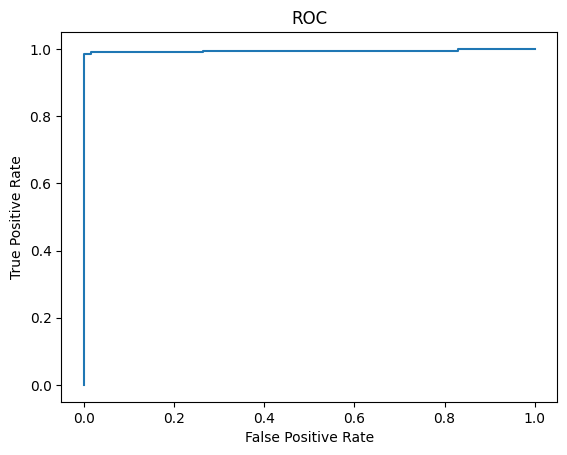

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_predproba[:,1])

df = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
df.to_csv("roc2.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
print(accuracy_score(Y_test,y_pred),"accuracy")
print(precision_score(Y_test,y_pred),"precision")
print()
print(recall_score(Y_test,y_pred),"recall")
print()
print(f1_score(Y_test,y_pred),"f1 score")
print()
from sklearn.metrics import roc_curve, auc
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc,"AUC")

In [23]:
df1=data[data.Class==0]
class1evidence=df1.shape[0]/totalsample
print(class1evidence)
df2=data[data.Class==1]
class2evidence=df2.shape[0]/totalsample
print(class2evidence)

0.3856858846918489
0.614314115308151


In [24]:
import openpyxl
wb=openpyxl.Workbook()
s1=wb.active
s1['A1']='Yield'
s1['B1']='Current'
s1['C1']='MP'
wb.save('output.xlsx')

In [25]:
traintotal=X_traino.shape[0]
yp=[]
xp=[]
zp=[]
mp=[]
px=[]
py=[]
workbook=openpyxl.load_workbook('output.xlsx')
sheet=workbook.active

for i in range(traintotal):
    if(Y_traino[i]==0):
        yp.append(y_predprobatrain[i,0])
        xp.append(X_traino[i,:])
        
testtotal=X_testo.shape[0]

for i in range(testtotal):
    if(Y_testo[i]==0):
        yp.append(y_predproba[i,0])
        xp.append(X_testo[i,:])
        
df1=data[data.Class==0]

for k in range(df1.shape[0]):
    zp.append(yp[k]*class1evidence)
    mp.append(0)

for i in range(df1.shape[0]):
    zz=0
    for j in range(df1.shape[0]):
        if(zp[i]>=zp[j]):
            zz=zz+1
    mp[i]=zz/df1.shape[0]
zsup=max(zp)
j=2
for k in range(len(yp)):
    if(mp[k]>0.5):
        sheet.cell(j,1).value=xp[k][0]
        sheet.cell(j,2).value=xp[k][1]
        sheet.cell(j,3).value=mp[k]
        j+=1
workbook.save('output.xlsx')

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred3=knn.predict(X_test)

In [27]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test,y_pred3)
auc_score7=roc_auc_score(Y_test, y_pred3)
print(fpr3)
print(tpr3)
print(thresholds3)
print(auc_score7)
y_pred3 = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(Y_test, y_pred3)
print(cm3)

[0.         0.02325581 1.        ]
[0. 1. 1.]
[inf  1.  0.]
0.9883720930232558
[[126   3]
 [  0 207]]


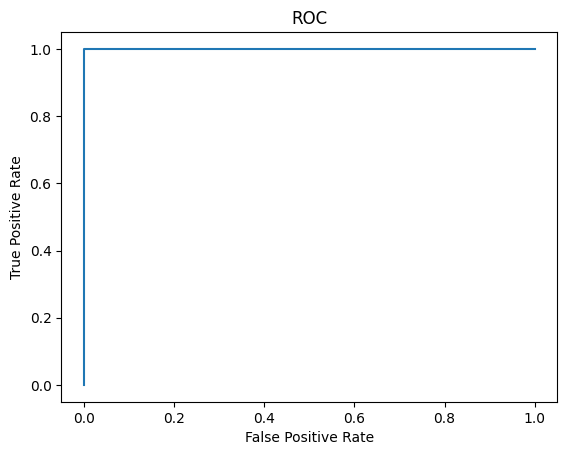

In [29]:
y_predproba12=knn.predict_proba(X_test1)
false_positive_rate12, true_positive_rate12, thresholds12 = roc_curve(Y_test1, y_predproba12[:,1])
df6 = pd.DataFrame({'Threshold': thresholds12, 
              'TPR': true_positive_rate12, 
              'FPR':false_positive_rate12
             })
df6.to_csv("roc12.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate12, true_positive_rate12)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train1, Y_train1)
y_pred7 = logistic_classifier.predict(X_test1)
print(confusion_matrix(Y_test1,y_pred7))
from sklearn.metrics import roc_curve, auc
fpr31, tpr31, thresholds31 = roc_curve(Y_test1,y_pred7)
auc_score8=roc_auc_score(Y_test1, y_pred7)
print(fpr31)
print(tpr31)
print(thresholds31)
print(auc_score8)
from sklearn.metrics import confusion_matrix,accuracy_score
cm31 = confusion_matrix(Y_test1, y_pred7)
print(cm31)

In [ ]:
import sklearn.neural_network 
neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu')
neural_network.fit(X_train1, Y_train1) 
y_pred10 = neural_network.predict(X_test1)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(Y_test1, y_pred10)
from sklearn.metrics import roc_curve, auc
fpr10, tpr10, thresholds10 = roc_curve(Y_test1,y_pred10)
auc_score10=roc_auc_score(Y_test1, y_pred10)
print(fpr10)
print(tpr10)
print(thresholds10)
print(auc_score10)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(Y_test1, y_pred10)
print(cm10)

In [ ]:
import sklearn.svm 
# Create an instance of the SVC class 
svm = sklearn.svm.SVC(kernel='linear', C=1.0) 
# Fit the model to the training data 
svm.fit(X_train, Y_train) 
# Predict the labels of new data 
y_pred11 = svm.predict(X_test)
fpr11, tpr11, thresholds11 = roc_curve(Y_test,y_pred11)
auc_score11=roc_auc_score(Y_test, y_pred11)
print(fpr11)
print(tpr11)
print(thresholds11)
print(auc_score11)
from sklearn.metrics import confusion_matrix,accuracy_score
cm11 = confusion_matrix(Y_test, y_pred11)
print(cm11)

In [ ]:
y_predproba10=neural_network.predict_proba(X_test1)
false_positive_rate10, true_positive_rate10, thresholds10 = roc_curve(Y_test1, y_predproba10[:,1])
df3 = pd.DataFrame({'Threshold': thresholds10, 
              'TPR': true_positive_rate10, 
              'FPR':false_positive_rate10
             })
df3.to_csv("roc10.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate10, true_positive_rate10)